# **Exoplanet Detection**

### Importing necessary libraries

In [1]:
import os
import pickle
from zipfile import ZipFile

import numpy as np
import pandas as pd

import plotly.graph_objs as go
from plotly.subplots import make_subplots

# TODO: Preprocessing, EDA, Training and other "important" stuff ...

### Loading dataset

In [ ]:
!kaggle datasets list -s 'kepler-labelled-time-series-data'
!kaggle datasets download -d keplersmachines/kepler-labelled-time-series-data

with ZipFile(r"kepler-labelled-time-series-data.zip", "r") as zip_data:
    zip_data.extractall(path=r"data\dataset")

In [2]:
test_data = r"data\dataset\exoTest.csv"
train_data = r"data\dataset\exoTrain.csv"

exoTrain = pd.read_csv(train_data)

### Uploaded data analysis

In [3]:
sfd = pd.read_csv(r"uploads\sample_flux_data.csv", usecols=lambda x: x != "Unnamed: 0")
sfd.shape[1]

3197

In [4]:
sfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Columns: 3197 entries, FLUX.1 to FLUX.3197
dtypes: float64(3197)
memory usage: 125.0 KB


### Flux intensity plots

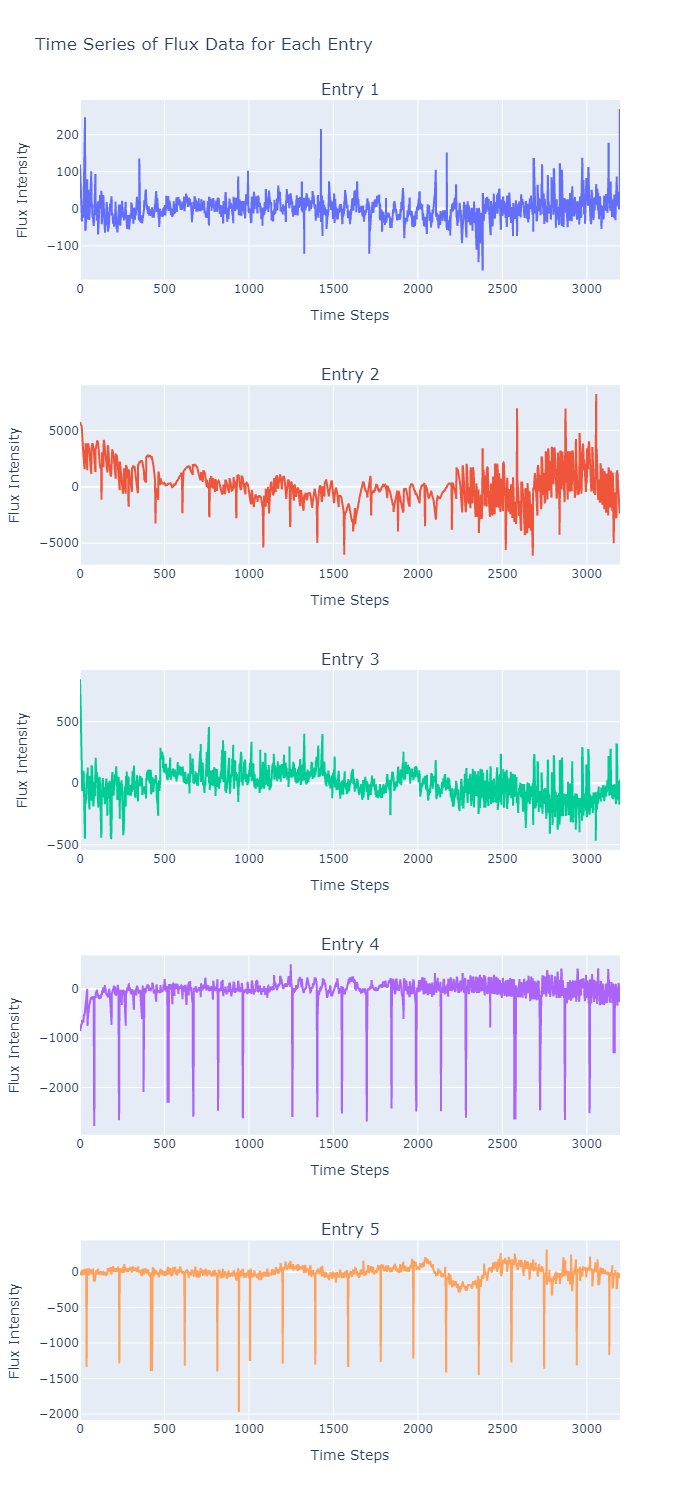

In [5]:
fig = make_subplots(
    rows=sfd.shape[0],
    cols=1,
    vertical_spacing=0.08,
    subplot_titles=[f"Entry {i + 1}" for i in range(sfd.shape[0])],
)

for index, row in sfd.iterrows():
    fig.add_trace(
        go.Scatter(
            x=[i for i in range(sfd.shape[1])],
            y=row.values,
            mode="lines",
            name=f"Entry {index + 1}",  # type: ignore
        ),
        row=index + 1,  # type: ignore
        col=1,
    )

for i in range(1, sfd.shape[0] + 1):
    fig.update_xaxes(title_text="Time Steps", row=i, col=1)
    fig.update_yaxes(title_text="Flux Intensity", row=i, col=1)

fig.update_layout(
    height=300 * sfd.shape[0],
    title="Time Series of Flux Data for Each Entry",
    xaxis_title="Time Steps",
    yaxis_title="Flux Intensity",
    template="plotly",
    showlegend=False,
)

fig.show("png")